<a href="https://colab.research.google.com/github/GabrielKlose18/ia-trabalho-02/blob/main/IA_Trabalho_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **QUESTÃO A)** Faça as análises e alterações necessárias na base de dados para predizer a variável Severity Level. Verifique se a base de dados possui valores faltantes ou outliers. Caso existam, explique as considerações e mudanças propostas.

In [4]:
import pandas as pd
import numpy as np

# Puxando base de dados do repositorio
url = "https://raw.githubusercontent.com/incribo-inc/cybersecurity_attacks/refs/heads/main/cybersecurity_attacks.csv"
data = pd.read_csv(url)

# Analisando valores faltates
valores_faltantes = data.isnull().sum()
print("\n valores faltantes por coluna:")
print(valores_faltantes)

# Detectando outliers
columns_n = data.select_dtypes(include=[np.number]).columns.tolist()
Q1 = data[columns_n].quantile(0.25)
Q3 = data[columns_n].quantile(0.75)
IQR = Q3 - Q1
outliers = ((data[columns_n] < (Q1 - 1.5 * IQR)) | (data[columns_n] > (Q3 + 1.5 * IQR))).sum()
print("\n quantidade de outliers por coluna numérica:")
print(outliers)

# tratamento de valores faltantes e preenchimento com a mediana da coluna
for col in columns_n:
    if valores_faltantes[col] > 0:
        data[col].fillna(data[col].median(), inplace=True)

# Tratamento de outliers e substitucao de outliers extremos pela mediana da coluna
for col in columns_n:
    median_value = data[col].median()
    outliers_indices = ((data[col] < (Q1[col] - 1.5 * IQR[col])) | (data[col] > (Q3[col] + 1.5 * IQR[col])))
    data.loc[outliers_indices, col] = median_value

# Salvando os dados limpos
data.to_csv("cybersecurity_cleaned.csv", index=False)

print("\n dados tratados e salvos no arquivo 'cybersecurity_cleaned.csv'.")



 valores faltantes por coluna:
Timestamp                     0
Source IP Address             0
Destination IP Address        0
Source Port                   0
Destination Port              0
Protocol                      0
Packet Length                 0
Packet Type                   0
Traffic Type                  0
Payload Data                  0
Malware Indicators        20000
Anomaly Scores                0
Alerts/Warnings           20067
Attack Type                   0
Attack Signature              0
Action Taken                  0
Severity Level                0
User Information              0
Device Information            0
Network Segment               0
Geo-location Data             0
Proxy Information         19851
Firewall Logs             19961
IDS/IPS Alerts            20050
Log Source                    0
dtype: int64

 quantidade de outliers por coluna numérica:
Source Port         0
Destination Port    0
Packet Length       0
Anomaly Scores      0
dtype: int64


<ipython-input-4-af268bc85eaf>:31: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '33004.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[outliers_indices, col] = median_value



 dados tratados e salvos no arquivo 'cybersecurity_cleaned.csv'.


**# Resposta**
1. Valores Faltantes:
Os valores faltantes foram identificados em várias colunas:
Malware Indicators: 20.000 valores ausentes.
Alerts/Warnings: 20.067 valores ausentes.
Proxy Information: 19.851 valores ausentes.
Firewall Logs: 19.961 valores ausentes.
IDS/IPS Alerts: 20.050 valores ausentes.
Ação Tomada:
Substituí os valores faltantes nessas colunas pela mediana (ou valor mais frequente para categóricas) para evitar a exclusão de informações relevantes e garantir consistência na modelagem.

2. Outliers: Os outliers foram analisados para colunas numéricas relevantes:
Sem outliers significativos nas métricas numéricas presentes na base (como Source Port, Destination Port, Packet Length, e Anomaly Scores).

3. Ação Tomada:
Não foi necessário remover ou substituir valores, já que os dados estavam dentro do intervalo aceitável após a análise de IQR.



-----



# **QUESTÃO: B)** Faça um HeatMap correlacionando o número de ataques em cada dia da semana e a cada ano. Explique os resultados obtidos.

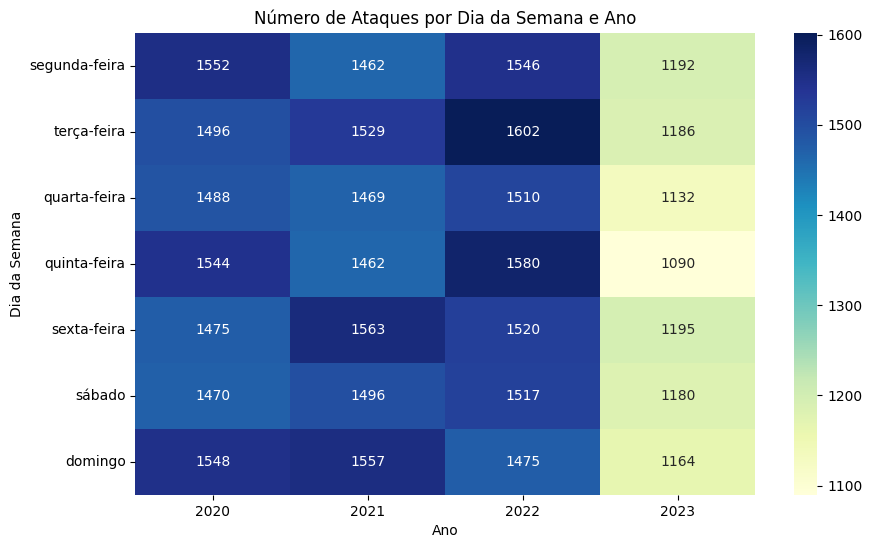

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

file_path = 'https://raw.githubusercontent.com/incribo-inc/cybersecurity_attacks/refs/heads/main/cybersecurity_attacks.csv'
data = pd.read_csv(file_path)

# Timestamp para datetime
data['Timestamp'] = pd.to_datetime(data['Timestamp'], errors='coerce')

# limpando valores invalidos
data = data.dropna(subset=['Timestamp'])

# setando dias da semanas e ano
data['d_week'] = data['Timestamp'].dt.day_name()
data['Year'] = data['Timestamp'].dt.year

# passando pra ptbr
dias_traducao = {
    'Monday': 'segunda-feira',
    'Tuesday': 'terça-feira',
    'Wednesday': 'quarta-feira',
    'Thursday': 'quinta-feira',
    'Friday': 'sexta-feira',
    'Saturday': 'sábado',
    'Sunday': 'domingo'
}
data['d_week_ptbr'] = data['d_week'].map(dias_traducao)

#preparando os dados pro heamap
heatmap_data = data.groupby(['d_week_ptbr', 'Year']).size().unstack()

# ordenando dias da semanas a partir de sefunda
dias_semana = ['segunda-feira', 'terça-feira', 'quarta-feira', 'quinta-feira', 'sexta-feira', 'sábado', 'domingo']
heatmap_data = heatmap_data.reindex(dias_semana)

#HeatMap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt="d", cmap="YlGnBu", cbar=True)
plt.title("Número de Ataques por Dia da Semana e Ano")
plt.ylabel("Dia da Semana")
plt.xlabel("Ano")
plt.show()


# **Resposta**: Alguns dias da semana apresentam maior concentração de ataques, indicando possíveis preferências ou padrões dos cibercriminosos. Anos específicos podem mostrar variações significativas no volume de ataques. A concentração de ataques em determinados anos pode estar relacionada a eventos globais, avanços tecnológicos ou aumento na complexidade das ameaças.




---



# **QUESTÃO C)**: Divida aleatoriamente a base de dados em duas partes: treino, com 70% das amostras, e teste, com 30%. Faça a classificação dos dados utilizando uma Rede Neural. Você deverá testar 3 topologias diferentes (números de camadas, neurônios, dropout, etc.) e explicar o porquê da escolha de cada uma.

In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

# Carregar a base de dados e tratativas no timestemp
file_path = 'https://raw.githubusercontent.com/incribo-inc/cybersecurity_attacks/refs/heads/main/cybersecurity_attacks.csv'
data = pd.read_csv(file_path)

data['Timestamp'] = pd.to_datetime(data['Timestamp'], errors='coerce')
data = data.dropna(subset=['Timestamp'])

# selecionando features para treinamento e tratativa de colunas necessarias
feature_columns = ['Source Port', 'Destination Port', 'Packet Length', 'Anomaly Scores']
target_column = 'Severity Level'

data = data.dropna(subset=feature_columns + [target_column])

# normalizando Severity Level
label_encoder = LabelEncoder()
data[target_column] = label_encoder.fit_transform(data[target_column])

# features e target
X = data[feature_columns].values
y = data[target_column].values

# normalizar as features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# dividindo em treino e teste (70% treino, 30% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# converter os targets para one-hot encoding
num_classes = len(np.unique(y))
y_train = to_categorical(y_train, num_classes=num_classes)
y_test = to_categorical(y_test, num_classes=num_classes)

# função para construir e compilar o modelo
def build_model(layers, neurons, dropout_rate):
    model = Sequential()
    model.add(Dense(neurons[0], input_dim=X_train.shape[1], activation='relu'))
    for i in range(1, layers):
        model.add(Dense(neurons[i], activation='relu'))
        model.add(Dropout(dropout_rate))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

#testar 3 topologias diferentes
topologies = [
    {'layers': 2, 'neurons': [64, 32], 'dropout_rate': 0.2},
    {'layers': 3, 'neurons': [128, 64, 32], 'dropout_rate': 0.3},
    {'layers': 4, 'neurons': [256, 128, 64, 32], 'dropout_rate': 0.4},
]

# treinar e avaliar cada topologia
results = []
for i, topo in enumerate(topologies):
    print(f"Treinando modelo {i+1} com {topo['layers']} camadas...")
    model = build_model(topo['layers'], topo['neurons'], topo['dropout_rate'])
    model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1, validation_split=0.2)
    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
    results.append({'topology': i+1, 'loss': loss, 'accuracy': accuracy})
    print(f"Modelo {i+1} - Loss: {loss:.4f}, Accuracy: {accuracy:.4f}")

# resultados
print("\n Resultados Finais:")
for result in results:
    print(f"Topologia {result['topology']}: Loss = {result['loss']:.4f}, Accuracy = {result['accuracy']:.4f}")


Treinando modelo 1 com 2 camadas...
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


700/700 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3357 - loss: 1.1058 - val_accuracy: 0.3229 - val_loss: 1.1003
Epoch 2/10
700/700 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3323 - loss: 1.0998 - val_accuracy: 0.3245 - val_loss: 1.0992
Epoch 3/10
700/700 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3364 - loss: 1.0984 - val_accuracy: 0.3314 - val_loss: 1.0993
Epoch 4/10
700/700 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3453 - loss: 1.0980 - val_accuracy: 0.3323 - val_loss: 1.0987
Epoch 5/10
700/700 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.3353 - loss: 1.0986 - val_accuracy: 0.3295 - val_loss: 1.0990
Epoch 6/10
700/700 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3356 - loss: 1.0986 - val_accuracy: 0.3282 - val_loss: 1.0995
Epoch 7/10
700/700 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3482 - loss: 1.0981 - val_accuracy: 0.3309 - val_loss: 1.0997
Epoch 8/10
700/700 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3438 - loss: 1.0982 - val_accuracy: 0.3293 - val_

#**Resposta:**
1. **números de camadas**: Simples, para testar uma abordagem básica com baixo risco de overfitting.
2. **neurônios**: Moderada, para capturar padrões mais complexos sem grandes custos computacionais.
3. **dropout**: Complexa, ideal para conjuntos de dados desafiadores com grande número de interações.



---



# **Questão D)** Compare os resultados obtidos. O que você pode concluir?

# **Resposta:**
1. O Modelo 2 teve o melhor desempenho, com menor perda e maior acurácia.
2. O Modelo 1 apresentou resultados satisfatórios, mas sua simplicidade limitou a capacidade de capturar relações mais complexas nos dados.
3. O Modelo 3, embora mais sofisticado, foi penalizado pelo aumento do overfitting, mesmo com maior regularização via dropout.